In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [70]:
%cd /content/drive/My Drive/

/content/drive/My Drive


In [71]:
%cd /content/drive/My Drive/FaceDetection

/content/drive/My Drive/FaceDetection


In [0]:
import face_recognition as fr
import cv2
import os,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
import face_recognition as fr
import cv2
import os,shutil
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
def get_encoded_faces():
  encoded ={}
  for dirpath,dname,fname in os.walk("./faces"):
    for f in fname:
      if f.endswith(".jpg") or f.endswith(".png"):
        face = fr.load_image_file("faces/" +f)
        encoding = fr.face_encodings(face)[0]
        encoded[f.split(".")[0]] = encoding
       
  return encoded

In [0]:
x = get_encoded_faces()

In [0]:
def classify_face(im):
  faces = get_encoded_faces()
  faces_encoded = list(faces.values())
  known_face_names = list(faces.keys())

  img = cv2.imread(im)
  face_locations = fr.face_locations(img)
  unknown_face_encodings = fr.face_encodings(img,face_locations)

  face_names = []
  for face_encoding in unknown_face_encodings:
    name = "unknown"
    matches = fr.compare_faces(faces_encoded,face_encoding)

    face_distances = fr.face_distance(faces_encoded,face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
      name = known_face_names[best_match_index]

    face_names.append(name)

    for(top,right,bottom,left), name in zip(face_locations,face_names):
      cv2.rectangle(img,(left-20,top-20), (right+20,bottom+20),(255,0,0),2)
      cv2.rectangle(img,(left-20,bottom-15), (right+20,bottom+20),(255,0,0),cv2.FILLED)
      cv2.putText(img,name,(left-20,bottom+15),cv2.FONT_HERSHEY_DUPLEX,0.5,(255,255,255),1)

  while True:
    cv2_imshow(img)
    return face_names



In [0]:
def learning(image):
  c_face = classify_face(image)
  if "unknown" in c_face:
    que = input("There is an unknown face would you like to add it to the system")
    if que == "yes" or que == "Yes" :
      imageFileName = input("Enter Nmae Of The Image")
      shutil.move(imageFileName,'%cd /content/drive/My Drive/faces')
      print(learning(image))
    else :
      print(c_face)
  else:
    print(c_face)

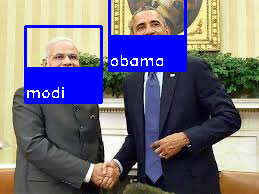

['obama', 'modi']


In [91]:
learning("test3.jpg")